In [97]:
import os
import pandas as pd
%matplotlib inline

In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [99]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [100]:
type(api_key)

str

In [101]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [173]:
# Fetch the Bitcoin news articles
bitcoin_news_articles = newsapi.get_everything(q="bitcoin", language="en")
type(bitcoin_news_articles)
# newsapi.get_sources()
bitcoin_news_articles

{'status': 'ok',
 'totalResults': 4327,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Laura Mallonee',
   'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
   'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
   'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
   'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
   'publishedAt': '2019-11-03T15:00:00Z',
   'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'},
  {'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Igor Bonifacic',
   'title': "HTC's Exodus 1s can run a full Bitcoin node for unde

In [103]:
# Print total articles
print(f"Total articles about bitcoin: {bitcoin_news_articles['totalResults']}")

# Show sample article
bitcoin_news_articles["articles"][0]

Total articles about bitcoin: 4318


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Laura Mallonee',
 'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
 'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
 'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
 'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
 'publishedAt': '2019-11-03T15:00:00Z',
 'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'}

In [114]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()
bitcoin_df.shape

(3, 5)

In [115]:
bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.2263,0.0,0.960,0.040,At least that's the idea. While it's not as in...
1,0.6124,0.0,0.891,0.109,"The Exodus 1 has a little brother, HTC announc..."
2,0.0000,0.0,1.000,0.000,"Recently, Canada’s central bank has been leadi..."


In [116]:
bitcoin_df.describe()

,compound,negative,neutral,positive
count,3.000000,3.0,3.000000,3.000000
mean,0.279567,0.0,0.950333,0.049667
std,0.309655,0.0,0.055139,0.055139
min,0.000000,0.0,0.891000,0.000000
25%,0.113150,0.0,0.925500,0.020000
50%,0.226300,0.0,0.960000,0.040000
75%,0.419350,0.0,0.980000,0.074500
max,0.612400,0.0,1.000000,0.109000


# Ethereum

In [126]:
# Fetch the Ethereum news articles
ethereum_news_articles = newsapi.get_everything(q="etherum", language="en")
type(ethereum_news_articles)

dict

In [127]:
# Print total articles
print(f"Total articles about ethereum: {ethereum_news_articles['totalResults']}")

# Show sample article
ethereum_news_articles["articles"][0]

Total articles about ethereum: 3


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Igor Bonifacic',
 'title': "HTC's Exodus 1s can run a full Bitcoin node for under $250",
 'description': 'After first teasing the device earlier this year, HTC has detailed its new, more affordable Exodus 1s blockchain smartphone. The highlight feature of the device is that it can function as a full node. This means the phone is able to validate and transmit Bitc…',
 'url': 'https://www.engadget.com/2019/10/19/htcs-exodus-1s-can-run-a-full-bitcoin-node-for-under-250/',
 'urlToImage': 'https://o.aolcdn.com/images/dims?thumbnail=1200%2C630&quality=80&image_uri=https%3A%2F%2Fo.aolcdn.com%2Fimages%2Fdims%3Fresize%3D2000%252C2000%252Cshrink%26image_uri%3Dhttps%253A%252F%252Fs.yimg.com%252Fos%252Fcreatr-uploaded-images%252F2019-10%252F5b2e2540-f1bb-11e9-bfea-b6dc6bf80ca3%26client%3Da1acac3e1b3290917d92%26signature%3D73d25f92ce3e2e12bc31ab15d08b1653f623e1bc&client=amp-blogside-v2&signature=cc686e16366411e6ee953c3aaaf1001061a10e73'

In [128]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.shape

(3, 6)

In [129]:
ethereum_df.head()

,date,compound,negative,neutral,positive,text
0,2019-10-19,0.2263,0.0,0.960,0.040,At least that's the idea. While it's not as in...
1,2019-10-19,0.6124,0.0,0.891,0.109,"The Exodus 1 has a little brother, HTC announc..."
2,2019-10-31,0.0000,0.0,1.000,0.000,"Recently, Canada’s central bank has been leadi..."


In [130]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,3.000000,3.0,3.000000,3.000000
mean,0.279567,0.0,0.950333,0.049667
std,0.309655,0.0,0.055139,0.055139
min,0.000000,0.0,0.891000,0.000000
25%,0.113150,0.0,0.925500,0.020000
50%,0.226300,0.0,0.960000,0.040000
75%,0.419350,0.0,0.980000,0.074500
max,0.612400,0.0,1.000000,0.109000


# Questions and Answers:

Q: Which coin had the highest mean positive score?

A: TBD has the highest mean positive score 

Q: Which coin had the highest compound score?

A: TBD has the highest compound score

Q. Which coin had the highest positive score?

A: TBD has the highest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [113]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Bitcoin tokenization

In [133]:
content = bitcoin_news_articles['articles'][1]['content']

words = word_tokenize(content)
content
# words

'The Exodus 1 has a little brother, HTC announced earlier today the Exodus 1s. After launching its first-ever blockchain smartphone late last year, HTC promised several months ago that a sequel will arrive in the second half of 2019.Well, it looks like the Tai… [+1658 chars]'

In [67]:
# NLTK stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [68]:
# Stop words comparison
sw = set(stopwords.words('english'))
first_result = [word.lower() for word in words if word.lower() not in sw]

In [69]:
print(first_result)

['least', "'s", 'idea', '.', "'s", 'intensive', 'mining', 'bitcoin', ',', 'running', 'full', 'node', 'still', 'requires', 'lot', 'computing', 'power', '.', 'fact', ',', 'htc', 'recommends', 'using', 'feature', 'phone', 'connected', 'wifi', 'plugged', 'power', 'adapter', '.', 'c…', '[', '+2014', 'chars', ']']


In [75]:
# We can define our own list of stopwords to add to the default nltk words
sw_addon = {'s', 'c...', ',','.'}
second_result = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]

In [76]:
print(second_result)

['least', "'s", 'idea', "'s", 'intensive', 'mining', 'bitcoin', 'running', 'full', 'node', 'still', 'requires', 'lot', 'computing', 'power', 'fact', 'htc', 'recommends', 'using', 'feature', 'phone', 'connected', 'wifi', 'plugged', 'power', 'adapter', 'c…', '[', '+2014', 'chars', ']']


In [161]:
from string import punctuation

In [170]:
# Complete the tokenizer function
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

def tokenizer(text):
    # Create a list of the words
    words = word_tokenize(text)
        
    # Convert the words to lowercase
    words = [x.lower() for x in words]
    
    # Remove the punctuation
#     words = ''.join([word for word in words if word not in punctuation])
#     punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
#     no_punct = ""
#     for word in words:
#         if word not in punctuations:
#             no_punct = no_punct + word
            
#     words = no_punct
    
    # Remove the stop words
    sw_addon = {'s', 'c...', ',','.'}
    words = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
           
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    tokens = words
    
    return tokens

In [171]:
# Need to change to entire text and append to inital dataframe table
text = bitcoin_news_articles['articles'][1]['content']

print(tokenizer(text))

['exodus', '1', 'little', 'brother', 'htc', 'announced', 'earlier', 'today', 'exodus', '1', 'launching', 'first-ever', 'blockchain', 'smartphone', 'late', 'last', 'year', 'htc', 'promised', 'several', 'month', 'ago', 'sequel', 'arrive', 'second', 'half', '2019.well', 'look', 'like', 'tai…', '[', '+1658', 'char', ']']


In [ ]:
# Creating a DataFrame Representation of the TF-IDF results
words_tfidf_df = pd.DataFrame(
    list(zip(words_tfidf, np.ravel(X_tfidf.sum(axis=0)))), columns=["Word", "Frequency"]
)

# Sorting words by 'Frequency' in descending order
words_tfidf_df = words_tfidf_df.sort_values(by=["Frequency"], ascending=False)

In [ ]:
#     cols = ["date", "compound", "negative", "neutral", "positive", "text"]
#     tokens = tokens[cols]

# Ethereum tokenization

In [13]:
# Expand the default stopwords list if necessary

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words

    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
    return tokens


In [15]:
# Create a new tokens column for bitcoin

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0516,0.900,0.036,0.064,Cryptocurrency exchange Binance has resumed tr...,"[Cryptocurrency, exchange, Binance, resumed, t..."
1,0.3818,0.943,0.000,0.057,"Bitcoin is now trading at around $8,130, up a ...","[Bitcoin, trading, around, 8,130, whopping, 60..."
2,-0.2263,0.888,0.065,0.047,Binance has vowed to raise the quality of its ...,"[Binance, vowed, raise, quality, security, aft..."
3,0.3612,0.937,0.000,0.063,A new payment network called Flexa is launchin...,"[new, payment, network, called, Flexa, launchi..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


In [16]:
# Create a new tokens column for ethereum

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3919,0.801,0.140,0.059,President Trump tweeted insults at Twitter aga...,"[President, Trump, tweeted, insult, Twitter, m..."
1,0.1779,0.961,0.000,0.039,After announcing that they were launching a ma...,"[announcing, launching, managed, blockchain, s..."
2,0.0000,1.000,0.000,0.000,Captain Kirk and neo-Dadaists. Repugnant marke...,"[Captain, Kirk, neo-Dadaists, Repugnant, marke..."
3,-0.8020,0.717,0.217,0.066,"So long as cryptocurrency exists, so too will ...","[long, cryptocurrency, exists, extraordinaryle..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [78]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Testing
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [80]:
article = bitcoin_news_articles['articles'][1]['content']

# processed = process_text(article)
# print(processed)

In [84]:
# Processing tokens
processed = article
processed = word_tokenize(processed)

word_counts = Counter(processed)
print(dict(word_counts))

{'At': 1, 'least': 1, 'that': 1, "'s": 2, 'the': 3, 'idea': 1, '.': 3, 'While': 1, 'it': 1, 'not': 1, 'as': 2, 'intensive': 1, 'mining': 1, 'Bitcoin': 1, ',': 2, 'running': 1, 'a': 2, 'full': 1, 'node': 1, 'still': 1, 'requires': 1, 'lot': 1, 'of': 1, 'computing': 1, 'power': 2, 'In': 1, 'fact': 1, 'HTC': 1, 'recommends': 1, 'only': 1, 'using': 1, 'feature': 1, 'while': 1, 'phone': 1, 'is': 1, 'connected': 1, 'to': 1, 'WiFi': 1, 'and': 1, 'plugged': 1, 'into': 1, 'its': 1, 'adapter': 1, 'The': 1, 'c…': 1, '[': 1, '+2014': 1, 'chars': 1, ']': 1}


In [85]:
# get top x words
print(dict(word_counts.most_common(5)))

{'the': 3, '.': 3, "'s": 2, 'as': 2, ',': 2}


In [86]:
# Frequency analysis- what is it combining
bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))

{('At', 'least'): 1, ('least', 'that'): 1, ('that', "'s"): 1, ("'s", 'the'): 1, ('the', 'idea'): 1, ('idea', '.'): 1, ('.', 'While'): 1, ('While', 'it'): 1, ('it', "'s"): 1, ("'s", 'not'): 1, ('not', 'as'): 1, ('as', 'intensive'): 1, ('intensive', 'as'): 1, ('as', 'mining'): 1, ('mining', 'Bitcoin'): 1, ('Bitcoin', ','): 1, (',', 'running'): 1, ('running', 'a'): 1, ('a', 'full'): 1, ('full', 'node'): 1, ('node', 'still'): 1, ('still', 'requires'): 1, ('requires', 'a'): 1, ('a', 'lot'): 1, ('lot', 'of'): 1, ('of', 'computing'): 1, ('computing', 'power'): 1, ('power', '.'): 1, ('.', 'In'): 1, ('In', 'fact'): 1, ('fact', ','): 1, (',', 'HTC'): 1, ('HTC', 'recommends'): 1, ('recommends', 'only'): 1, ('only', 'using'): 1, ('using', 'the'): 1, ('the', 'feature'): 1, ('feature', 'while'): 1, ('while', 'the'): 1, ('the', 'phone'): 1, ('phone', 'is'): 1, ('is', 'connected'): 1, ('connected', 'to'): 1, ('to', 'WiFi'): 1, ('WiFi', 'and'): 1, ('and', 'plugged'): 1, ('plugged', 'into'): 1, ('into',

In [87]:
print(dict(bigram_counts.most_common(10)))

{('At', 'least'): 1, ('least', 'that'): 1, ('that', "'s"): 1, ("'s", 'the'): 1, ('the', 'idea'): 1, ('idea', '.'): 1, ('.', 'While'): 1, ('While', 'it'): 1, ('it', "'s"): 1, ("'s", 'not'): 1}


In [18]:
# Generate the Bitcoin N-grams where N=2

[(('40', 'million'), 3),
 (('Cryptocurrency', 'exchange'), 2),
 (('exchange', 'Binance'), 2),
 (('crypto', 'asset'), 2),
 (('world', '’'), 2),
 (('crypto', 'exchange'), 2),
 (('7,000', 'bitcoins'), 2),
 (('one', 'world'), 2),
 (('price', 'Bitcoin'), 2),
 (('Wall', 'Street'), 2),
 (('Street', 'Market'), 2),
 (('last', 'week'), 2),
 (('char', 'Cryptocurrency'), 2),
 (('Binance', 'resumed'), 1),
 (('resumed', 'trading'), 1),
 (('trading', 'activity'), 1),
 (('activity', 'Users'), 1),
 (('Users', 'cancel'), 1),
 (('cancel', 'open'), 1),
 (('open', 'order'), 1)]

In [19]:
# Generate the Ethereum N-grams where N=2

[(('private', 'key'), 5),
 (('Ethereum', 'ETH'), 3),
 (('blockchain', 'bandit'), 2),
 (('last', 'year'), 2),
 (('weak', 'private'), 2),
 (('Elon', 'Musk'), 2),
 (('worth', 'Ethereum'), 2),
 (('JP', 'Morgan'), 2),
 (('President', 'Trump'), 1),
 (('Trump', 'tweeted'), 1),
 (('tweeted', 'insult'), 1),
 (('insult', 'Twitter'), 1),
 (('Twitter', 'morning'), 1),
 (('morning', 'time'), 1),
 (('time', 'Jack'), 1),
 (('Jack', 'took'), 1),
 (('took', 'conversation'), 1),
 (('conversation', 'platform'), 1),
 (('platform', 'White'), 1),
 (('White', 'House'), 1)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin

[('char', 16),
 ('Bitcoin', 8),
 ('’', 8),
 ('price', 6),
 ('hacker', 6),
 ('exchange', 5),
 ('Binance', 5),
 ('crypto', 4),
 ('cryptocurrency', 4),
 ('million', 4)]

In [22]:
# Get the top 10 words for Ethereum

[('char', 19),
 ('Ethereum', 9),
 ('blockchain', 8),
 ('key', 7),
 ('private', 5),
 ('world', 5),
 ('time', 4),
 ('weak', 4),
 ('million', 4),
 ('transaction', 4)]

# Word Clouds

In [90]:
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

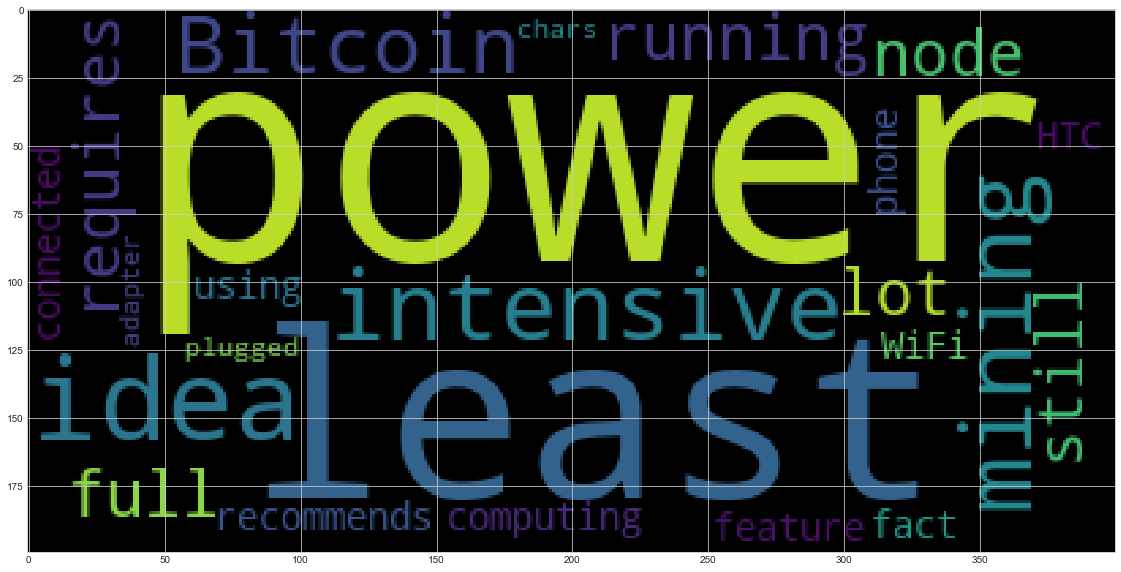

In [91]:
wc = WordCloud().generate(content)
plt.imshow(wc)

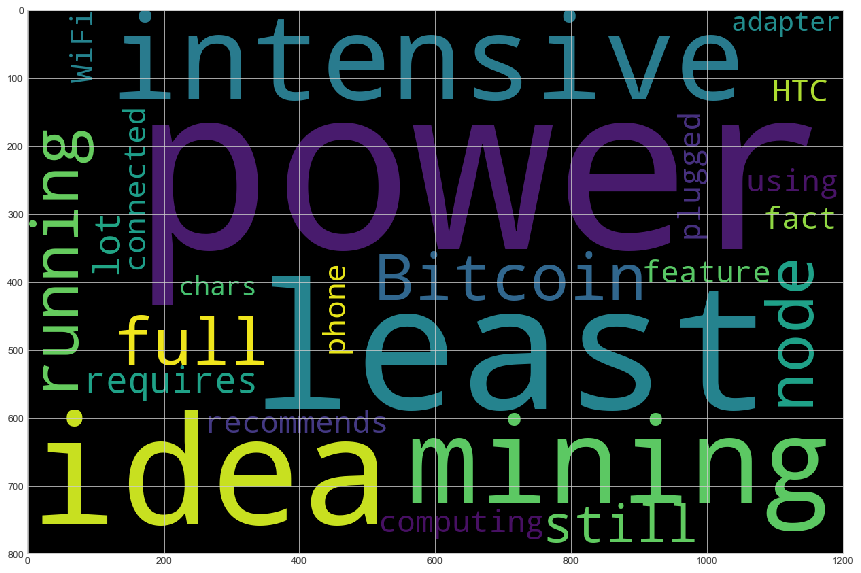

In [92]:
wc = WordCloud(width=1200, height=800, max_words=50).generate(content)
plt.imshow(wc)

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

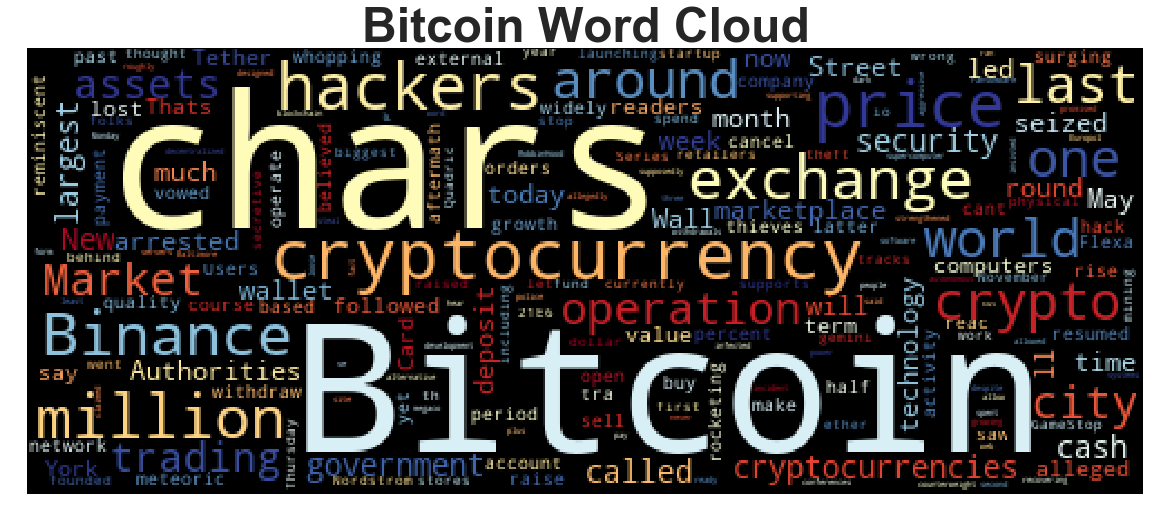

In [25]:
# Generate the Bitcoin word cloud

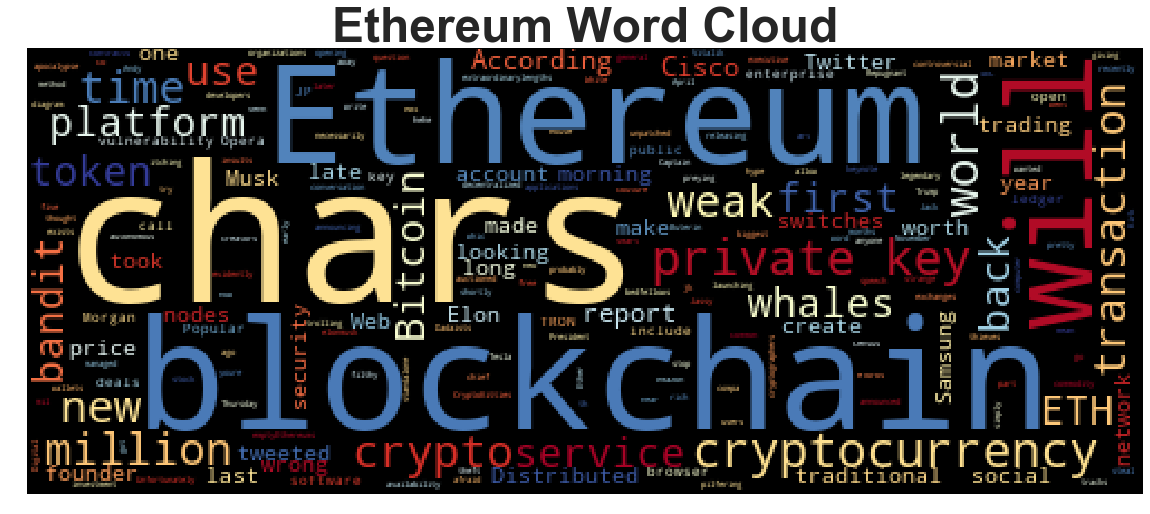

In [26]:
# Generate the Ethereum word cloud

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [93]:
import spacy
from spacy import displacy

In [94]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [96]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u"Michael Jordan was a player in the National Basketball Association.")

for ent in doc.ents:
    print(ent.text, ent.label_)

In [ ]:
article = reuters.raw(fileids = reuters.fileids(categories='yen')[1])

In [ ]:
# Render visualiztion
doc = nlp(article)
displacy.render(doc, style='ent')

In [ ]:
# List all entitites
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together

'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [32]:
# Render the visualization

In [33]:
# List all Entities

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text

# Add a title to the document

In [36]:
# Render the visualization

In [37]:
# List all Entities

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f